In [3]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target       
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: >

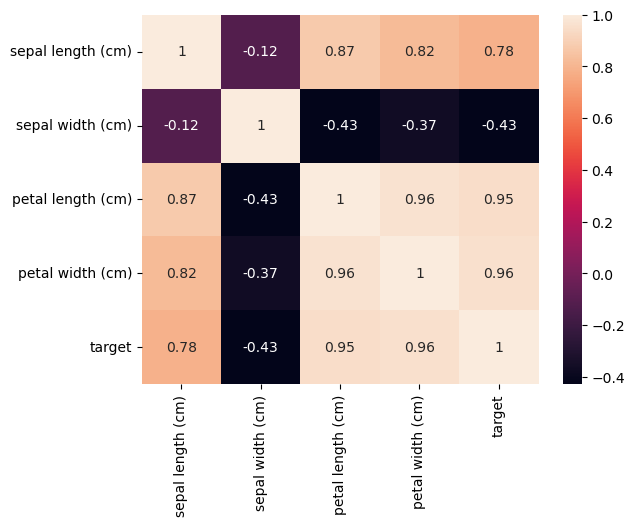

In [4]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

In [5]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac  

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("TRAINiNG DATA ACCURACY")
print("Logistic Regression:",ac(y_train,model.predict(x_train)))
print('------------------------------------------------')
print("TEST DATA ACCURACY")
print("Logistic Regression:",ac(y_test,model.predict(x_test)))

TRAINiNG DATA ACCURACY
Logistic Regression: 0.9666666666666667
------------------------------------------------
TEST DATA ACCURACY
Logistic Regression: 1.0


D:\yahiya\anoconda\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
import numpy as np
flower_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

def predict_flower_species(sl, sw, pl, pw):
    new = np.array([[sl, sw, pl, pw]])
    return flower_names[model.predict(new)[0]]

sl = float(input("Enter the sepal length (cm):"))
sw = float(input("Enter the sepal width (cm) :"))
pl = float(input("Enter the petal length (cm):"))
pw = float(input("Enter the petal width (cm) :"))

flower_species = predict_flower_species(sl, sw, pl, pw)

print('The flower species is:', flower_species)

Enter the sepal length (cm):5
Enter the sepal width (cm) :6
Enter the petal length (cm):3
Enter the petal width (cm) :1.2
The flower species is: Setosa


D:\yahiya\anoconda\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]], dtype=int64)

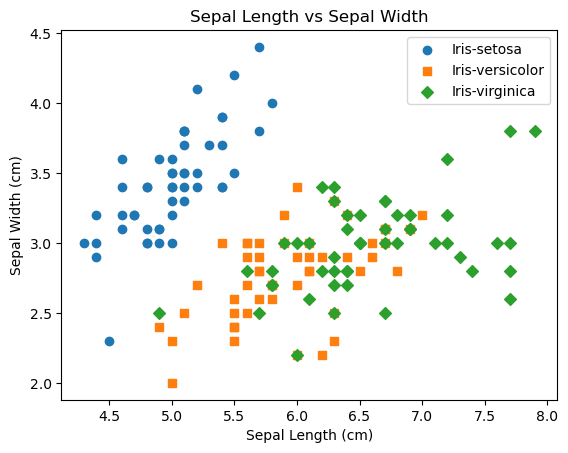

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df[df['target']==0]['sepal length (cm)'],
            df[df['target']==0]['sepal width (cm)'],
            label='Iris-setosa', marker='o')

plt.scatter(df[df['target']==1]['sepal length (cm)'],
            df[df['target']==1]['sepal width (cm)'],
            label='Iris-versicolor', marker='s')

plt.scatter(df[df['target']==2]['sepal length (cm)'],
            df[df['target']==2]['sepal width (cm)'],
            label='Iris-virginica', marker='D')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()